<a href="https://colab.research.google.com/github/juangrave9/mathworks/blob/main/Extracci%C3%B3n_L_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def predictor(x,coef_array):
  grade_of_estimation=len(coef_array)
  y_pred=[]
  for xpoint in x:
    ypoint=0
    for i in range(grade_of_estimation):
      ypoint+=coef_array[i]*(xpoint)**(grade_of_estimation-(i+1))
    y_pred.append(ypoint)
  return y_pred

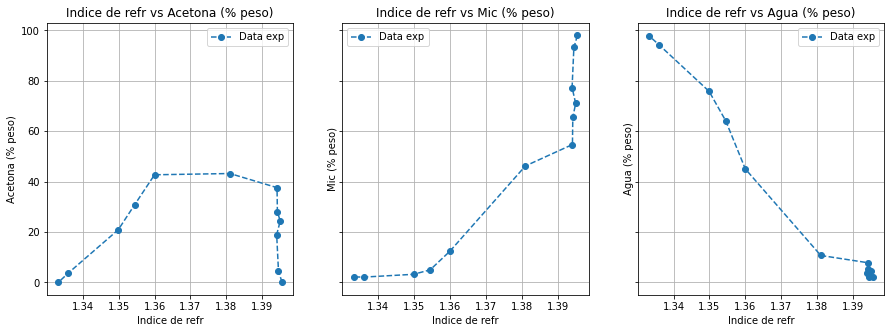

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
calib_path='https://github.com/juangrave9/mathworks/raw/main/Calibration.tsv'
df=pd.read_csv(calib_path,sep='\t')


fig,ax=plt.subplots(ncols=3,figsize=(15,5),sharey=True)
x=df.iloc[:,3]
for i in range(3):
  y=df.iloc[:,i]
  
  for grade in [1,2]:
    reg=np.polyfit(x,y,deg=grade)
    #ax[i].plot(x,predictor(x,reg),'o--',label=f'bolazo grado {grade}')
  ax[i].plot(x,y,'o--',label='Data exp')
  ax[i].set_title(f'{x.name} vs {y.name}')
  ax[i].set_xlabel(x.name)
  ax[i].set_ylabel(y.name)
  ax[i].grid()
  ax[i].legend()
plt.show()

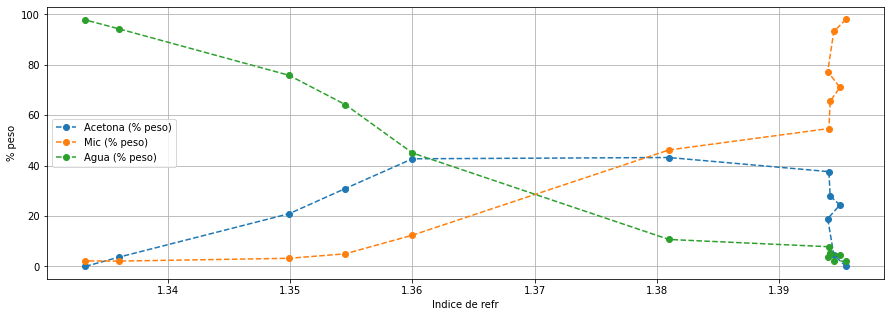

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
x=df.iloc[:,3]
for i in range(3):
  y=df.iloc[:,i]
  
  for grade in [1,2]:
    reg=np.polyfit(x,y,deg=grade)
    #ax[i].plot(x,predictor(x,reg),'o--',label=f'bolazo grado {grade}')
  ax.plot(x,y,'o--',label=y.name)
  
  ax.set_xlabel(x.name)
  ax.set_ylabel('% peso')
  ax.grid()
  ax.legend()
plt.show()

In [ ]:
df

,Acetona (% peso),Mic (% peso),Agua (% peso),Indice de refr
0,0.00,98.00,2.00,1.3955
1,4.60,93.20,2.33,1.3945
2,18.95,77.30,3.86,1.3940
3,24.40,71.00,4.66,1.3950
4,27.90,65.50,5.53,1.3942
5,37.60,54.70,7.82,1.3941
6,43.20,46.20,10.70,1.3810
7,42.70,12.40,45.00,1.3600
8,30.90,5.01,64.20,1.3545
9,20.90,3.23,75.80,1.3499


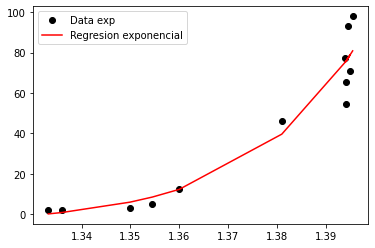

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
y=df.iloc[:,1]
def func(x, a, b, c):
  return a * np.exp(b * x) + c



plt.figure()
plt.plot(x, y, 'ko', label="Data exp")
popt, pcov = curve_fit(func, x, y,maxfev=10000)
plt.plot(x, func(x, *popt), 'r-', label="Regresion exponencial")
plt.legend()
plt.show()

In [ ]:
popt

array([ 3.98484210e-26,  4.51008239e+01, -5.06545868e+00])

In [ ]:
reg=np.polyfit(df['Indice de refr'],df['Agua (% peso)'],deg=1)

In [ ]:
agua=df['Agua (% peso)']
mic=df['Mic (% peso)']
acetona=df['Acetona (% peso)']
datair=df['Indice de refr']

In [ ]:
def linfunc(x,m,b):
  return m*x+b
  
def expfunc(x, a, b, c):
  return a * np.exp(b * x) + c

exp_popt, exp_pcov = curve_fit(expfunc,datair,mic,maxfev=10000)
lin_popt, lin_pcov = curve_fit(linfunc,datair,agua)

#Ternario

In [ ]:
exp_path='https://github.com/juangrave9/mathworks/raw/main/Experimentation.tsv'
experimental=pd.read_csv(exp_path,sep='\t')
experimental=experimental.iloc[:8,1:]
experimental

,R Agua,R Acetona,R MIC,E Agua,E Acetona,E MIC,Tag,mez AG,mez AC,mez MIC
0,87.37205902,11.41454511,1.213395877,3.262734828,31.94458421,64.79268097,S/F = 1.79,20.680000,15.860000,63.450000
1,82.25173421,16.05340627,1.694859525,4.203003993,38.47026203,57.32673398,S/F = 1.09,27.140975,20.816864,52.042161
2,82.25173421,16.05340627,1.694859525,3.753377424,36.48297652,59.76364606,164 RPM,27.140975,20.816864,52.042161
3,82.25173421,16.05340627,1.694859525,4.203003993,38.47026203,57.32673398,412 RPM,27.140975,20.816864,52.042161
4,85.74113159,12.93672156,1.322146846,3.262734828,31.94458421,64.79268097,705 RPM,27.140975,20.816864,52.042161
5,56.9233018,34.79966186,8.277036344,4.047834667,20.48057159,75.47159374,Etapa 1,46.501129,35.665914,17.832957
6,76.51946547,20.83857913,2.641955396,5.487306448,41.904573,52.60812055,Etapa 2,NaN,NaN,NaN
7,90.3828101,8.466085221,1.15110468,3.348321256,26.62301522,70.02866353,Etapa 3,NaN,NaN,NaN


In [ ]:
def makeAxis(title, tickangle):
    return {
      'title': title  ,
      'titlefont': { 'size': 10 },
      'tickangle': tickangle,
      
      'tickcolor': 'rgba(0,0,0,0)',
      'tickvals':np.arange(0,100,10),
      'showline': True,
      'showgrid': True
    }

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
IR=df['Indice de refr']
agua=df['Agua (% peso)']
mic=df['Mic (% peso)']
acetona=df['Acetona (% peso)']

poligono = go.Scatterternary(a=acetona,b=agua,c=mic,mode='markers+text',fill='toself',showlegend=False)
texta = go.Scatterternary(a=acetona[:7],b=agua[:7],c=mic[:7],mode='text',text=round(IR[:7],3),showlegend=False,textposition="top left")
textb = go.Scatterternary(a=acetona[7:],b=agua[7:],c=mic[7:],mode='text',text=round(IR[7:],3),showlegend=False,textposition="top right")

trace_data = [poligono,texta,textb]


fig = go.Figure(data=trace_data,layout=go.Layout(height=600,width=600,margin=dict(b=50,l=50,r=50,t=50,autoexpand=False)))



fig.update_layout({ 
    'title': 'Curva binodal / Indices de refracción - Acetona/MIC/Agua',
    
    'ternary': {
        'sum': 100,
         'aaxis': makeAxis('Acetona', 0 ) ,
        'baxis': makeAxis('Agua', 45),
        'caxis': makeAxis('MIC', 0)},
   
    
})

fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

poligono = go.Scatterternary(a=acetona,b=agua,c=mic,mode='markers',fill='toself',showlegend=False)
trace_data = [poligono]
for i in range(2):
  row=experimental.iloc[i,:]
  
  trace_data.append(go.Scatterternary(a=(row['R Acetona'],row['E Acetona']),
                                      b=(row['R Agua'],row['E Agua']),
                                      c=(row['R MIC'],row['E MIC']),name=row['Tag']))
  #if row['mez AG']>0:
   # trace_data.append(go.Scatterternary(a=(row['mez AC'],0),
    #                  b=(row['mez AG'],0),
     #                 c=(row['mez MIC'],0),name='Mezcla de '+ row['Tag']))






fig = go.Figure(data=trace_data,layout=go.Layout(height=400,width=400))


def makeAxis(title, tickangle):
    return {
      'title': title  ,
      'titlefont': { 'size': 10 },
      'tickangle': tickangle,
      
      'tickcolor': 'rgba(0,0,0,0)',
      'tickvals':np.arange(0,100,10),
      'showline': True,
      'showgrid': True
    }

fig.update_layout({ 
    'title': 'Diagrama ternario - S/F',
    
    'ternary': {
        'sum': 100,
         'aaxis': makeAxis('Acetona', 0 ) ,
        'baxis': makeAxis('Agua', 45),
        'caxis': makeAxis('MIC', 0)},
   
    
})

fig.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

poligono = go.Scatterternary(a=acetona,b=agua,c=mic,mode='markers',fill='toself',showlegend=False)
trace_data = [poligono]
for i in range(2,5):
  row=experimental.iloc[i,:]
  trace_data.append(go.Scatterternary(a=(row['R Acetona'],row['E Acetona']),
                                      b=(row['R Agua'],row['E Agua']),
                                      c=(row['R MIC'],row['E MIC']),name=row['Tag']))
  #if i==4:
   #   trace_data.append(go.Scatterternary(a=(row['mez AC'],0),
    #                  b=(row['mez AG'],0),
     #                 c=(row['mez MIC'],0),name='Puntos mezcla'))






fig = go.Figure(data=trace_data,layout=go.Layout(height=600,width=600))


def makeAxis(title, tickangle):
    return {
      'title': title  ,
      'titlefont': { 'size': 10 },
      'tickangle': tickangle,
      
      'tickcolor': 'rgba(0,0,0,0)',
      'tickvals':np.arange(0,100,10),
      'showline': True,
      'showgrid': True
    }

fig.update_layout({ 
    'title': 'Diagrama ternario - Variacion de Agitacion',
    
    'ternary': {
        'sum': 100,
         'aaxis': makeAxis('Acetona', 0 ) ,
        'baxis': makeAxis('Agua', 45),
        'caxis': makeAxis('MIC', 0)},
   
    
})

fig.show()


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

poligono = go.Scatterternary(a=acetona,b=agua,c=mic,mode='markers',fill='toself',showlegend=False)
trace_data = [poligono]
for i in range(5,8):  
  if i==7:
    row=experimental.iloc[i,:]
  
    trace_data.append(go.Scatterternary(a=(row['R Acetona'],row['E Acetona']),
                                        b=(row['R Agua'],row['E Agua']),
                                        c=(row['R MIC'],row['E MIC']),name=row['Tag']))
    
  else :

    row=experimental.iloc[i,:]
    
    trace_data.append(go.Scatterternary(a=(row['R Acetona'],row['E Acetona']),
                                          b=(row['R Agua'],row['E Agua']),
                                          c=(row['R MIC'],row['E MIC']),name=row['Tag']))
    trace_data.append(go.Scatterternary(a=[row['R Acetona'],0.0],
                                          b=[row['R Agua'],0.0],
                                          c=[row['R MIC'],100]
                                        ,showlegend=False,
                                        line = dict(dash='dash')))
    
 # if row['mez AG']>0:
  #  trace_data.append(go.Scatterternary(a=(row['mez AC'],0),
   #                   b=(row['mez AG'],0),
    #                  c=(row['mez MIC'],0),name='Punto mezcla'))








fig = go.Figure(data=trace_data,layout=go.Layout(height=600,width=600))



fig.update_layout({ 
    'title': 'Diagrama ternario - Multietapas',
    
    'ternary': {
        'sum': 100,
         'aaxis': makeAxis('Acetona', 0 ) ,
        'baxis': makeAxis('Agua', 45),
        'caxis': makeAxis('MIC', 0)},
   
    
})

fig.show()
